In [2]:
import torch
import numpy as np
import scipy.stats
import scipy.linalg
import itertools
import pandas 
import seaborn as snsas pd

## Reading LaLonde Dataset

In [3]:
df_cps1 = pd.read_stata('https://users.nber.org/~rdehejia/data/cps_controls.dta')
df_cps3 = pd.read_stata('https://users.nber.org/~rdehejia/data/cps_controls3.dta')
df_nsw = pd.read_stata('https://users.nber.org/~rdehejia/data/nsw_dw.dta')

## NSW Dataset

In [116]:
df = df_nsw
X = np.array(df["treat"].values.tolist())
Yflag = (df["re78"] > df["re75"])
Y = np.array((Yflag*1).values.tolist())

In [117]:
df

,data_id,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78
0,Dehejia-Wahba Sample,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.000000,0.000000,9930.045898
1,Dehejia-Wahba Sample,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.000000,0.000000,3595.894043
2,Dehejia-Wahba Sample,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.000000,0.000000,24909.449219
3,Dehejia-Wahba Sample,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.000000,0.000000,7506.145996
4,Dehejia-Wahba Sample,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.000000,0.000000,289.789886
...,...,...,...,...,...,...,...,...,...,...,...
440,Dehejia-Wahba Sample,0.0,21.0,9.0,1.0,0.0,0.0,1.0,31886.429688,12357.219727,0.000000
441,Dehejia-Wahba Sample,0.0,28.0,11.0,1.0,0.0,0.0,1.0,17491.449219,13371.250000,0.000000
442,Dehejia-Wahba Sample,0.0,29.0,9.0,0.0,1.0,0.0,1.0,9594.307617,16341.160156,16900.300781
443,Dehejia-Wahba Sample,0.0,25.0,9.0,1.0,0.0,1.0,1.0,24731.619141,16946.630859,7343.963867


In [71]:
# missing re74 or no degree
Z = np.array([0] * df.shape[0])
for i in range(df.shape[0]):
    if ((df["re75"][i] == 0) and (df["married"][i] == 0)):
        Z[i] = 3
    elif ((df["re75"][i] == 0) and (df["married"][i] > 0)):
        Z[i] = 2
    elif ((df["re75"][i] > 0) and (df["married"][i] == 0)):
        Z[i] = 1
    elif ((df["re75"][i] > 0) and (df["married"][i] > 0)):
        Z[i] = 0
        
# Strata by age
W = np.array([0] * df.shape[0])
for i in range(df.shape[0]):
    if df["age"][i] >= df["age"].quantile(0.9):
        W[i] = 3
    elif (df["age"][i] >= df["age"].quantile(0.7)) and (df["age"][i] < df["age"].quantile(0.9)):
        W[i] = 2
    elif (df["age"][i] >= df["age"].quantile(0.25)) and (df["age"][i] < df["age"].quantile(0.7)):
        W[i] = 1
    elif (df["age"][i] >= df["age"].quantile(0)) and (df["age"][i] < df["age"].quantile(0.25)):
        W[i] = 0

In [118]:
# missing re74 or no degree
Z = np.array([0] * df.shape[0])
for i in range(df.shape[0]):
    if ((df["nodegree"][i] == 0) and (df["married"][i] == 0)):
        Z[i] = 3
    elif ((df["nodegree"][i] == 0) and (df["married"][i] > 0)):
        Z[i] = 2
    elif ((df["nodegree"][i] > 0) and (df["married"][i] == 0)):
        Z[i] = 1
    elif ((df["nodegree"][i] > 0) and (df["married"][i] > 0)):
        Z[i] = 0
        
# Strata by age
W = np.array([0] * df.shape[0])
for i in range(df.shape[0]):
    if df["age"][i] >= df["age"].quantile(0.9):
        W[i] = 3
    elif (df["age"][i] >= df["age"].quantile(0.7)) and (df["age"][i] < df["age"].quantile(0.9)):
        W[i] = 2
    elif (df["age"][i] >= df["age"].quantile(0.25)) and (df["age"][i] < df["age"].quantile(0.7)):
        W[i] = 1
    elif (df["age"][i] >= df["age"].quantile(0)) and (df["age"][i] < df["age"].quantile(0.25)):
        W[i] = 0

In [119]:
df

,data_id,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78
0,Dehejia-Wahba Sample,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.000000,0.000000,9930.045898
1,Dehejia-Wahba Sample,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.000000,0.000000,3595.894043
2,Dehejia-Wahba Sample,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.000000,0.000000,24909.449219
3,Dehejia-Wahba Sample,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.000000,0.000000,7506.145996
4,Dehejia-Wahba Sample,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.000000,0.000000,289.789886
...,...,...,...,...,...,...,...,...,...,...,...
440,Dehejia-Wahba Sample,0.0,21.0,9.0,1.0,0.0,0.0,1.0,31886.429688,12357.219727,0.000000
441,Dehejia-Wahba Sample,0.0,28.0,11.0,1.0,0.0,0.0,1.0,17491.449219,13371.250000,0.000000
442,Dehejia-Wahba Sample,0.0,29.0,9.0,0.0,1.0,0.0,1.0,9594.307617,16341.160156,16900.300781
443,Dehejia-Wahba Sample,0.0,25.0,9.0,1.0,0.0,1.0,1.0,24731.619141,16946.630859,7343.963867


### Estimating P1, P0, Q1, and Q0

In [38]:
def calculate_PQ(X,Y,Z,W):
    phat_z0x1 = (np.sum((Z==0) & (X==1))/np.sum(X==1))
    phat_z1x1 = (np.sum((Z==1) & (X==1))/np.sum(X==1))
    phat_z2x1 = (np.sum((Z==2) & (X==1))/np.sum(X==1))
    phat_z3x1 = (np.sum((Z==3) & (X==1))/np.sum(X==1))
    phat_z0x0 = (np.sum((Z==0) & (X==0))/(np.sum(X==0)))
    phat_z1x0 = (np.sum((Z==1) & (X==0))/(np.sum(X==0)))
    phat_z2x0 = (np.sum((Z==2) & (X==0))/(np.sum(X==0)))
    phat_z3x0 = (np.sum((Z==3) & (X==0))/(np.sum(X==0)))
    phat_w0x1 = (np.sum((W==0) & (X==1))/np.sum(X==1))
    phat_w1x1 = (np.sum((W==1) & (X==1))/np.sum(X==1))
    phat_w2x1 = (np.sum((W==2) & (X==1))/np.sum(X==1))
    phat_w3x1 = (np.sum((W==3) & (X==1))/np.sum(X==1))
    phat_w0x0 = (np.sum((W==0) & (X==0))/(np.sum(X==0)))
    phat_w1x0 = (np.sum((W==1) & (X==0))/(np.sum(X==0)))
    phat_w2x0 = (np.sum((W==2) & (X==0))/(np.sum(X==0)))
    phat_w3x0 = (np.sum((W==3) & (X==0))/(np.sum(X==0)))
    phat_z0w0x1 = np.sum((Z==0) & (W==0) & (X==1))/np.sum(X==1)
    phat_z0w1x1 = np.sum((Z==0) & (W==1) & (X==1))/np.sum(X==1)
    phat_z0w2x1 = np.sum((Z==0) & (W==2) & (X==1))/np.sum(X==1)
    phat_z0w3x1 = np.sum((Z==0) & (W==3) & (X==1))/np.sum(X==1)
    phat_z0w0x0 = np.sum((Z==0) & (W==0) & (X==0))/(np.sum(X==0))
    phat_z0w1x0 = np.sum((Z==0) & (W==1) & (X==0))/(np.sum(X==0))
    phat_z0w2x0 = np.sum((Z==0) & (W==2) & (X==0))/(np.sum(X==0))
    phat_z0w3x0 = np.sum((Z==0) & (W==3) & (X==0))/(np.sum(X==0))
    phat_z1w0x1 = np.sum((Z==1) & (W==0) & (X==1))/np.sum(X==1)
    phat_z1w1x1 = np.sum((Z==1) & (W==1) & (X==1))/np.sum(X==1)
    phat_z1w2x1 = np.sum((Z==1) & (W==2) & (X==1))/np.sum(X==1)
    phat_z1w3x1 = np.sum((Z==1) & (W==3) & (X==1))/np.sum(X==1)
    phat_z1w0x0 = np.sum((Z==1) & (W==0) & (X==0))/(np.sum(X==0))
    phat_z1w1x0 = np.sum((Z==1) & (W==1) & (X==0))/(np.sum(X==0))
    phat_z1w2x0 = np.sum((Z==1) & (W==2) & (X==0))/(np.sum(X==0))
    phat_z1w3x0 = np.sum((Z==1) & (W==3) & (X==0))/(np.sum(X==0))
    phat_z2w0x1 = np.sum((Z==2) & (W==0) & (X==1))/np.sum(X==1)
    phat_z2w1x1 = np.sum((Z==2) & (W==1) & (X==1))/np.sum(X==1)
    phat_z2w2x1 = np.sum((Z==2) & (W==2) & (X==1))/np.sum(X==1)
    phat_z2w3x1 = np.sum((Z==2) & (W==3) & (X==1))/np.sum(X==1)
    phat_z2w0x0 = np.sum((Z==2) & (W==0) & (X==0))/(np.sum(X==0))
    phat_z2w1x0 = np.sum((Z==2) & (W==1) & (X==0))/(np.sum(X==0))
    phat_z2w2x0 = np.sum((Z==2) & (W==2) & (X==0))/(np.sum(X==0))
    phat_z2w3x0 = np.sum((Z==2) & (W==3) & (X==0))/(np.sum(X==0))
    phat_z3w0x1 = np.sum((Z==3) & (W==0) & (X==1))/np.sum(X==1)
    phat_z3w1x1 = np.sum((Z==3) & (W==1) & (X==1))/np.sum(X==1)
    phat_z3w2x1 = np.sum((Z==3) & (W==2) & (X==1))/np.sum(X==1)
    phat_z3w3x1 = np.sum((Z==3) & (W==3) & (X==1))/np.sum(X==1)
    phat_z3w0x0 = np.sum((Z==3) & (W==0) & (X==0))/(np.sum(X==0))
    phat_z3w1x0 = np.sum((Z==3) & (W==1) & (X==0))/(np.sum(X==0))
    phat_z3w2x0 = np.sum((Z==3) & (W==2) & (X==0))/(np.sum(X==0))
    phat_z3w3x0 = np.sum((Z==3) & (W==3) & (X==0))/(np.sum(X==0))
    phat_y_x1 = (np.sum((Y==1) & (X==1))/np.sum(X==1))
    phat_y_x0 = (np.sum((Y==1) & (X==0))/np.sum(X==0))
    phat_yz0_x1 = (np.sum((Y==1) & (Z==0) & (X==1))/np.sum(X==1))
    phat_yz1_x1 = (np.sum((Y==1) & (Z==1) & (X==1))/np.sum(X==1))
    phat_yz2_x1 = (np.sum((Y==1) & (Z==2) & (X==1))/np.sum(X==1))
    phat_yz3_x1 = (np.sum((Y==1) & (Z==3) & (X==1))/np.sum(X==1))
    phat_yw0_x1 = (np.sum((Y==1) & (W==0) & (X==1))/np.sum(X==1))
    phat_yw1_x1 = (np.sum((Y==1) & (W==1) & (X==1))/np.sum(X==1))
    phat_yw2_x1 = (np.sum((Y==1) & (W==2) & (X==1))/np.sum(X==1))
    phat_yw3_x1 = (np.sum((Y==1) & (W==3) & (X==1))/np.sum(X==1))
    phat_yz0_x0 = (np.sum((Y==1) & (Z==0) & (X==0))/np.sum(X==0))
    phat_yz1_x0 = (np.sum((Y==1) & (Z==1) & (X==0))/np.sum(X==0))
    phat_yz2_x0 = (np.sum((Y==1) & (Z==2) & (X==0))/np.sum(X==0))
    phat_yz3_x0 = (np.sum((Y==1) & (Z==3) & (X==0))/np.sum(X==0))
    phat_yw0_x0 = (np.sum((Y==1) & (W==0) & (X==0))/np.sum(X==0))
    phat_yw1_x0 = (np.sum((Y==1) & (W==1) & (X==0))/np.sum(X==0))
    phat_yw2_x0 = (np.sum((Y==1) & (W==2) & (X==0))/np.sum(X==0))
    phat_yw3_x0 = (np.sum((Y==1) & (W==3) & (X==0))/np.sum(X==0))
    phat_yz0w0_x1 = (np.sum((Y==1) & (Z==0) & (W==0) & (X==1))/np.sum(X==1))
    phat_yz0w1_x1 = (np.sum((Y==1) & (Z==0) & (W==1) & (X==1))/np.sum(X==1))
    phat_yz0w2_x1 = (np.sum((Y==1) & (Z==0) & (W==2) & (X==1))/np.sum(X==1))
    phat_yz0w3_x1 = (np.sum((Y==1) & (Z==0) & (W==3) & (X==1))/np.sum(X==1))
    phat_yz1w0_x1 = (np.sum((Y==1) & (Z==1) & (W==0) & (X==1))/np.sum(X==1))
    phat_yz1w1_x1 = (np.sum((Y==1) & (Z==1) & (W==1) & (X==1))/np.sum(X==1))
    phat_yz1w2_x1 = (np.sum((Y==1) & (Z==1) & (W==2) & (X==1))/np.sum(X==1))
    phat_yz1w3_x1 = (np.sum((Y==1) & (Z==1) & (W==3) & (X==1))/np.sum(X==1))
    phat_yz2w0_x1 = (np.sum((Y==1) & (Z==2) & (W==0) & (X==1))/np.sum(X==1))
    phat_yz2w1_x1 = (np.sum((Y==1) & (Z==2) & (W==1) & (X==1))/np.sum(X==1))
    phat_yz2w2_x1 = (np.sum((Y==1) & (Z==2) & (W==2) & (X==1))/np.sum(X==1))
    phat_yz2w3_x1 = (np.sum((Y==1) & (Z==2) & (W==3) & (X==1))/np.sum(X==1))
    phat_yz3w0_x1 = (np.sum((Y==1) & (Z==3) & (W==0) & (X==1))/np.sum(X==1))
    phat_yz3w1_x1 = (np.sum((Y==1) & (Z==3) & (W==1) & (X==1))/np.sum(X==1))
    phat_yz3w2_x1 = (np.sum((Y==1) & (Z==3) & (W==2) & (X==1))/np.sum(X==1))
    phat_yz3w3_x1 = (np.sum((Y==1) & (Z==3) & (W==3) & (X==1))/np.sum(X==1))
    phat_yz0w0_x0 = (np.sum((Y==1) & (Z==0) & (W==0) & (X==0))/np.sum(X==0))
    phat_yz0w1_x0 = (np.sum((Y==1) & (Z==0) & (W==1) & (X==0))/np.sum(X==0))
    phat_yz0w2_x0 = (np.sum((Y==1) & (Z==0) & (W==2) & (X==0))/np.sum(X==0))
    phat_yz0w3_x0 = (np.sum((Y==1) & (Z==0) & (W==3) & (X==0))/np.sum(X==0))
    phat_yz1w0_x0 = (np.sum((Y==1) & (Z==1) & (W==0) & (X==0))/np.sum(X==0))
    phat_yz1w1_x0 = (np.sum((Y==1) & (Z==1) & (W==1) & (X==0))/np.sum(X==0))
    phat_yz1w2_x0 = (np.sum((Y==1) & (Z==1) & (W==2) & (X==0))/np.sum(X==0))
    phat_yz1w3_x0 = (np.sum((Y==1) & (Z==1) & (W==3) & (X==0))/np.sum(X==0))
    phat_yz2w0_x0 = (np.sum((Y==1) & (Z==2) & (W==0) & (X==0))/np.sum(X==0))
    phat_yz2w1_x0 = (np.sum((Y==1) & (Z==2) & (W==1) & (X==0))/np.sum(X==0))
    phat_yz2w2_x0 = (np.sum((Y==1) & (Z==2) & (W==2) & (X==0))/np.sum(X==0))
    phat_yz2w3_x0 = (np.sum((Y==1) & (Z==2) & (W==3) & (X==0))/np.sum(X==0))
    phat_yz3w0_x0 = (np.sum((Y==1) & (Z==3) & (W==0) & (X==0))/np.sum(X==0))
    phat_yz3w1_x0 = (np.sum((Y==1) & (Z==3) & (W==1) & (X==0))/np.sum(X==0))
    phat_yz3w2_x0 = (np.sum((Y==1) & (Z==3) & (W==2) & (X==0))/np.sum(X==0))
    phat_yz3w3_x0 = (np.sum((Y==1) & (Z==3) & (W==3) & (X==0))/np.sum(X==0))
    phat_x1 = np.sum(X==1)/X.shape[0]
    phat_x0 = np.sum(X==0)/X.shape[0]

    ### Calculating P1, P0, Q1, Q0
    Phat1 = np.array([[1, phat_z0x1, phat_z1x1, phat_z2x1],
                     [phat_w0x1, phat_z0w0x1, phat_z1w0x1, phat_z2w0x1],
                     [phat_w1x1, phat_z0w1x1, phat_z1w1x1, phat_z2w1x1],
                     [phat_w2x1, phat_z0w2x1, phat_z1w2x1, phat_z2w2x1]])
    Phat0 = np.array([[1, phat_z0x0, phat_z1x0, phat_z2x0],
                     [phat_w0x0, phat_z0w0x0, phat_z1w0x0, phat_z2w0x0],
                     [phat_w1x0, phat_z0w1x0, phat_z1w1x0, phat_z2w1x0],
                     [phat_w2x0, phat_z0w2x0, phat_z1w2x0, phat_z2w2x0]])
    Qhat1 = np.array([[phat_y_x1, phat_yz0_x1, phat_yz1_x1, phat_yz2_x1],
                      [phat_yw0_x1, phat_yz0w0_x1, phat_yz1w0_x1, phat_yz2w0_x1],
                      [phat_yw1_x1, phat_yz0w1_x1, phat_yz1w1_x1, phat_yz2w1_x1],
                      [phat_yw2_x1, phat_yz0w2_x1, phat_yz1w2_x1, phat_yz2w2_x1]])
    Qhat0 = np.array([[phat_y_x0, phat_yz0_x0, phat_yz1_x0, phat_yz2_x0],
                      [phat_yw0_x0, phat_yz0w0_x0, phat_yz1w0_x0, phat_yz2w0_x0],
                      [phat_yw1_x0, phat_yz0w1_x0, phat_yz1w1_x0, phat_yz2w1_x0],
                      [phat_yw2_x0, phat_yz0w2_x0, phat_yz1w2_x0, phat_yz2w2_x0]])

    return Phat1, Phat0, Qhat1, Qhat0

In [120]:

Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)

In [146]:
Qhat0.round(3)

array([[0.581, 0.046, 0.446, 0.023],
       [0.177, 0.008, 0.169, 0.   ],
       [0.223, 0.019, 0.177, 0.004],
       [0.135, 0.015, 0.062, 0.015]])

### Estimating joint distribution of potential outcomes

In [47]:
def eval_perm1(S, P1, P0, Q1, Q0):
    P1 = torch.from_numpy(P1.astype(np.float32)).clone()
    P0 = torch.from_numpy(P0.astype(np.float32)).clone()
    Q1 = torch.from_numpy(Q1.astype(np.float32)).clone()
    Q0 = torch.from_numpy(Q0.astype(np.float32)).clone()

    PQ1 = np.dot(np.linalg.inv(P1), Q1)
    PQ1 = torch.from_numpy(PQ1.astype(np.float32)).clone()
    PQ0 = np.dot(np.linalg.inv(P0), Q0)
    PQ0 = torch.from_numpy(PQ0.astype(np.float32)).clone()

    Mx1 = np.array(
        [[1,0,0,0],
         [0,1,0,0],
         [0,0,0,0],
         [0,0,0,0]]
    )
    Mx0 = np.array(
        [[1,0,0,0],
         [0,0,0,0],
         [0,0,1,0],
         [0,0,0,0]]
    )
    Mx1 = torch.from_numpy(Mx1.astype(np.float32)).clone()
    Mx0 = torch.from_numpy(Mx0.astype(np.float32)).clone()

    diag1 = torch.mm(torch.mm(S, PQ1), torch.inverse(S))
    diag0 = torch.mm(torch.mm(S, PQ0), torch.inverse(S))
        
    loss = (
            torch.norm(diag1 - Mx1)**2 + torch.norm(diag0 - Mx0)**2
    )
    u1 = torch.mm(P1, torch.inverse(S))[0,:]
    u0 = torch.mm(P0, torch.inverse(S))[0,:]

    return loss,u1,u0,diag1,diag0

In [48]:
def commutabilitycheck(P1,P0,Q1,Q0):
    PQ1 = np.dot(np.linalg.inv(P1), Q1)
    PQ0 = np.dot(np.linalg.inv(P0), Q0)
    return np.linalg.norm(np.dot(PQ1, PQ0)-np.dot(PQ0,PQ1))

In [49]:
def optim(P1, P0, Q1, Q0, phat_x1, phat_x0, learning_rate = 1e-5, seed = None, maxiter=20000, rho=0.5):
    P1 = torch.from_numpy(P1.astype(np.float32)).clone()
    P0 = torch.from_numpy(P0.astype(np.float32)).clone()
    Q1 = torch.from_numpy(Q1.astype(np.float32)).clone()
    Q0 = torch.from_numpy(Q0.astype(np.float32)).clone()

    PQ1 = np.dot(np.linalg.inv(P1), Q1)
    PQ1 = torch.from_numpy(PQ1.astype(np.float32)).clone()
    PQ0 = np.dot(np.linalg.inv(P0), Q0)
    PQ0 = torch.from_numpy(PQ0.astype(np.float32)).clone()
    print("Commutability check:", commutabilitycheck(P1,P0,Q1,Q0))
    
    Mx1 = np.array(
        [[1,0,0,0],
         [0,1,0,0],
         [0,0,0,0],
         [0,0,0,0]]
    )
    Mx0 = np.array(
        [[1,0,0,0],
         [0,0,0,0],
         [0,0,1,0],
         [0,0,0,0]]
    )
    Mx1 = torch.from_numpy(Mx1.astype(np.float32)).clone()
    Mx0 = torch.from_numpy(Mx0.astype(np.float32)).clone()
    
    r1 = r0 = rho
    lambdavec1 = torch.zeros(4)
    lambdavec0  = torch.zeros(4)
    
    # Randomly initialize estimates
    if seed is not None:
        np.random.seed(seed)  
        torch.manual_seed(seed)      
    S = np.random.rand(4, 3)
    for i in range(4):
        for j in range(3):
            S[i,j] = (1 - S[i,:j].sum()) * np.random.rand(1)
    S = torch.from_numpy(S.astype(np.float32)).clone()
    S.requires_grad = True
    
    u1 = torch.mm(P1, torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))[0,:]
    u0 = torch.mm(P0, torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))[0,:]
    
    losslist = np.array([])
    for t in range(maxiter):
        diag1 = torch.mm(torch.mm(torch.cat([torch.ones(4,1),S], dim=1), PQ1), 
                         torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))
        diag0 = torch.mm(torch.mm(torch.cat([torch.ones(4,1),S], dim=1), PQ0), 
                         torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))
        u1 = torch.clamp(torch.mm(P1, torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))[0,:], max=1, min=1e-4)
        u0 = torch.clamp(torch.mm(P0, torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))[0,:], max=1, min=1e-4)

        f = torch.zeros(6)
        if torch.any((lambdavec1 + rho * (u1 - 1)) > 1):
            f1a = (
                (lambdavec1 * (u1 - 1))[(lambdavec1 + rho * (u1 - 1)) > 1] 
                + (rho/2) * torch.linalg.norm(u1[(lambdavec1 + rho * (u1 - 1)) > 1] - 1)**2
                  )
            f[0] = torch.sum(f1a)
        elif torch.any(lambdavec1 + rho * u1 < 1):
            f1b = (
                (lambdavec1 * u1)[(lambdavec1 + rho * u1) < 1] +
                (rho/2) * torch.linalg.norm(u1[(lambdavec1 + rho * u1) < 1])**2)
            f[1] = torch.sum(f1b)
        elif not (torch.any((lambdavec1 + rho * (u1 - 1)) > 1) or torch.any(lambdavec1 + rho * u1 < 1)):
            f1c = (- lambdavec1[not (any((lambdavec1 + rho * (u1 - 1)) > 1) or any((lambdavec1 + rho * u1) < 1))]**2 / (2*rho))
            f[2] = torch.sum(f1c)

        if torch.any((lambdavec0 + rho * (u0 - 1)) > 1):
            f0a = ((lambdavec0 * (u0 - 1))[(lambdavec0 + rho * (u0 - 1)) > 1] 
                + (rho/2) * torch.linalg.norm(u0[(lambdavec0 + rho * (u0 - 1)) > 1] - 1)**2)
            f[3] = torch.sum(f0a)
        elif torch.any((lambdavec0 + rho * u0) < 1):
            f0b = ((lambdavec0 * u0)[(lambdavec0 + rho * u0) < 1] 
                + (rho/2) * torch.linalg.norm(u0[(lambdavec0 + rho * u0) < 1])**2)
            f[4] = torch.sum(f0b)
        elif not (torch.any((lambdavec0 + rho * (u0 - 1)) > 1) or torch.any(lambdavec0 + rho * u0 < 1)):
            f0c = (- lambdavec0[not (any((lambdavec0 + rho * (u0 - 1)) > 1) or any((lambdavec0 + rho * u0) < 1))]**2 / (2*rho))
            f[5] = torch.sum(f0c)
        
        loss = (
            torch.norm(diag1 - Mx1) + torch.norm(diag0 - Mx0)
            + r1 * (torch.dot(torch.ones(4), u1) - 1) + rho/2  * (torch.dot(torch.ones(4), u1) - 1)**2
            + r0 * (torch.dot(torch.ones(4), u0) - 1) + rho/2  * (torch.dot(torch.ones(4), u0) - 1)**2
            + torch.sum(f)
        )
        loss.backward()

        with torch.no_grad():
            for i in range(4):
                for j in range(3):
                    S[i,j] = torch.clamp(S[i,j], max=1, min=1e-4)
                    if j>=1:
                        S[i,j] = torch.clamp(S[i,j], max=1-S[i,:j].sum()*0.5, min=1e-4)
                    
            S -= learning_rate * S.grad
            # Manually zero the gradients after updating estimates
            S.grad.zero_()
            
        r1 += rho * (torch.dot(torch.ones(4), u1.clone().detach()) - 1)
        r0 += rho * (torch.dot(torch.ones(4), u0.clone().detach()) - 1)

        if torch.any((lambdavec1.detach() + rho * (u1 - 1)) > 1):
            lambdavec1.detach()[(lambdavec1.detach() + rho * (u1 - 1)) > 1] = ((lambdavec1.detach() * (u1 - 1))[(lambdavec1.detach() + rho * (u1 - 1)) > 1] 
                + (rho/2) * torch.norm(u1[(lambdavec1.detach() + rho * (u1 - 1)) > 1] - 1)**2)
        elif torch.any((lambdavec1.detach() + rho * u1) < 1):
            lambdavec1.detach()[(lambdavec1.detach() + rho * u1) < 1] = ((lambdavec1.detach() * u1)[(lambdavec1.detach() + rho * u1) < 1] 
                + (rho/2) * torch.norm(u1[(lambdavec1.detach() + rho * u1) < 1])**2)    
        if torch.any((lambdavec0.detach() + rho * (u0 - 1)) > 1):
            lambdavec0.detach()[(lambdavec0.detach() + rho * (u0 - 1)) > 1] = ((lambdavec0.detach() * (u0 - 1))[(lambdavec0.detach() + rho * (u0 - 1)) > 1] 
                + (rho/2) * torch.norm(u0[(lambdavec0.detach() + rho * (u0 - 1)) > 1] - 1)**2)
        elif torch.any((lambdavec0.detach() + rho * u0) < 1):
            lambdavec0.detach()[(lambdavec0.detach() + rho * u0) < 1] = ((lambdavec0.detach() * u0)[(lambdavec0.detach() + rho * u0) < 1] 
                + (rho/2) * torch.norm(u0[(lambdavec0.detach() + rho * u0) < 1])**2)    
            
        if t % 1000 == 999:
            losslist = np.append(losslist, loss.item())
            print(t, loss.item(), torch.mm(P1, torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))[0,:])
            
    S = torch.cat([torch.ones(4,1),S], dim=1)

    loss_perm_list = []
    u1_list = []
    u0_list = []
    loss_min = np.inf 
#     print(S)
    for v in itertools.permutations([0,1,2,3], 4):
        loss_perm, u1_cand, u0_cand,diag1_cand,diag0_cand = eval_perm1(S[v,:], Phat1, Phat0, Qhat1, Qhat0)
        loss_perm += (r1 * (torch.dot(torch.ones(4), u1_cand) - 1) + rho/2  * (torch.dot(torch.ones(4), u1_cand) - 1)**2
            + r0 * (torch.dot(torch.ones(4), u0_cand) - 1) + rho/2  * (torch.dot(torch.ones(4), u0_cand) - 1)**2
            + torch.sum(f))
        loss_perm_list.append(loss_perm)
        u1_list.append(u1_cand)
        u0_list.append(u0_cand)
        if loss_perm < loss_min:
            loss_min = loss_perm
            S_hat = S[v,:]
            u1_hat = torch.mm(P1, torch.inverse(S_hat))[0,:]
            u0_hat = torch.mm(P0, torch.inverse(S_hat))[0,:]
    u_hat = u1_hat * phat_x1 + u0_hat * phat_x0
    return S.to('cpu').detach().numpy().copy(), S_hat.to('cpu').detach().numpy().copy(), u_hat.to('cpu').detach().numpy().copy(), u1_hat.to('cpu').detach().numpy().copy(), u0_hat.to('cpu').detach().numpy().copy(), loss_perm_list, loss_min

In [161]:
Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)

if (np.linalg.cond(Phat1) >= 1/np.finfo(Phat1.dtype).eps) or (np.linalg.cond(Phat0) >= 1/np.finfo(Phat0.dtype).eps):
    print("Phat1 or Phat0 is singular...")

if commutabilitycheck(Phat1,Phat0,Qhat1,Qhat0)>10000:
    print("Non-commutative...")
    
#S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
#    Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=10000, learning_rate=5e-4, rho=0.5, seed=2021)

In [152]:
np.random.seed(2022)
S_cand_list = []
S_hat_list = []
u_hat_list = []
u1_hat_list = []
u0_hat_list = []
losslist_list = []
loss_min_list = []
# Take minimum loss while repeating 5 times
for k in range(10):
    print("Repeat: ",k)
    S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
            Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=10000, learning_rate=5e-4, rho=0.5)
    print(u_hat,loss_min)
    cnt = 0 # counter for re-initialization
    while any(u_hat<0) | any(u_hat>1):
        cnt += 1
        print("Re-initialization...")        
        try:
            S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
                    Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=10000, learning_rate=5e-4, rho=0.5)
        except RuntimeError: # if S is singular
            print('Error')
            continue            
        print(u_hat,loss_min)

    S_cand_list.append(S_cand)
    S_hat_list.append(S_hat)
    u_hat_list.append(u_hat)
    u1_hat_list.append(u1_hat)
    u0_hat_list.append(u0_hat)
    losslist_list.append(losslist)
    loss_min_list.append(loss_min.detach())

minidx = np.argmin(loss_min_list)
u_hat = u_hat_list[minidx]
print(u_hat,loss_min_list[minidx])

Repeat:  0
Commutability check: 27.4973
999 8.021628379821777 tensor([0.2504, 0.4057, 0.1505, 0.1934], grad_fn=<SliceBackward>)
1999 7.956346035003662 tensor([0.1704, 0.4473, 0.1539, 0.2284], grad_fn=<SliceBackward>)
2999 7.909611225128174 tensor([0.1351, 0.4517, 0.0860, 0.3271], grad_fn=<SliceBackward>)
3999 7.890269756317139 tensor([0.1403, 0.4459, 0.0680, 0.3458], grad_fn=<SliceBackward>)
4999 7.888035297393799 tensor([0.1465, 0.4439, 0.0586, 0.3511], grad_fn=<SliceBackward>)
5999 7.888330459594727 tensor([0.1496, 0.4431, 0.0542, 0.3531], grad_fn=<SliceBackward>)
6999 7.888724327087402 tensor([0.1510, 0.4427, 0.0525, 0.3539], grad_fn=<SliceBackward>)
7999 7.888942718505859 tensor([0.1515, 0.4426, 0.0517, 0.3542], grad_fn=<SliceBackward>)
8999 7.889037609100342 tensor([0.1518, 0.4425, 0.0514, 0.3543], grad_fn=<SliceBackward>)
9999 7.889087677001953 tensor([0.1519, 0.4425, 0.0513, 0.3544], grad_fn=<SliceBackward>)
[0.31075752 0.31497458 0.20174386 0.17252417] tensor(38.2778, grad_fn=<

In [169]:
print(u_hat.round(3))
print((u_hat[1]-u_hat[2]).round(3))
print((u_hat[1]).round(3))

[0.277 0.383 0.174 0.167]
0.209
0.383


<AxesSubplot:>

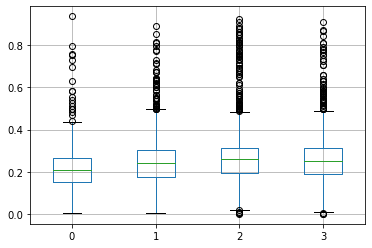

In [58]:
pd.DataFrame(u_sim100_1000_type1).boxplot()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

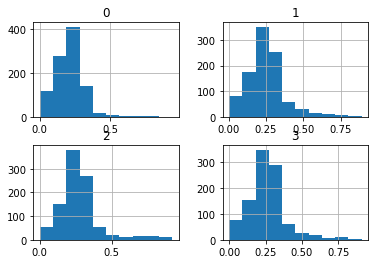

In [61]:
pd.DataFrame(u_sim100_1000_type1).hist()

## CPS1 Dataset

In [170]:
df = pd.concat([df_nsw[df_nsw["treat"] == 1], df_cps3], ignore_index=True)
df

,data_id,treat,age,education,black,hispanic,married,nodegree,re74,re75,re78
0,Dehejia-Wahba Sample,1.0,37.0,11.0,1.0,0.0,1.0,1.0,0.0,0.0,9930.045898
1,Dehejia-Wahba Sample,1.0,22.0,9.0,0.0,1.0,0.0,1.0,0.0,0.0,3595.894043
2,Dehejia-Wahba Sample,1.0,30.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,24909.449219
3,Dehejia-Wahba Sample,1.0,27.0,11.0,1.0,0.0,0.0,1.0,0.0,0.0,7506.145996
4,Dehejia-Wahba Sample,1.0,33.0,8.0,1.0,0.0,0.0,1.0,0.0,0.0,289.789886
...,...,...,...,...,...,...,...,...,...,...,...
609,CPS3,0.0,18.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,10150.500000
610,CPS3,0.0,24.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,19464.609375
611,CPS3,0.0,21.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
612,CPS3,0.0,32.0,5.0,1.0,0.0,1.0,1.0,0.0,0.0,187.671295


In [171]:
X = np.array(df["treat"].values.tolist())
Yflag = (df["re78"] > df["re75"])
Y = np.array((Yflag*1).values.tolist())
# missing re74 or no degree
Z = np.array([0] * df.shape[0])
for i in range(df.shape[0]):
    if ((df["re75"][i] == 0) and (df["married"][i] == 0)):
        Z[i] = 3
    elif ((df["re75"][i] == 0) and (df["married"][i] > 0)):
        Z[i] = 2
    elif ((df["re75"][i] > 0) and (df["married"][i] == 0)):
        Z[i] = 1
    elif ((df["re75"][i] > 0) and (df["married"][i] > 0)):
        Z[i] = 0
        
# Strata by age
W = np.array([0] * df.shape[0])
for i in range(df.shape[0]):
    if df["age"][i] >= df["age"].quantile(0.9):
        W[i] = 3
    elif (df["age"][i] >= df["age"].quantile(0.7)) and (df["age"][i] < df["age"].quantile(0.9)):
        W[i] = 2
    elif (df["age"][i] >= df["age"].quantile(0.25)) and (df["age"][i] < df["age"].quantile(0.7)):
        W[i] = 1
    elif (df["age"][i] >= df["age"].quantile(0)) and (df["age"][i] < df["age"].quantile(0.25)):
        W[i] = 0

### Estimating P1, P0, Q1, and Q0

In [172]:
Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)

### Estimating joint distribution of potential outcomes

In [175]:
Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)

if (np.linalg.cond(Phat1) >= 1/np.finfo(Phat1.dtype).eps) or (np.linalg.cond(Phat0) >= 1/np.finfo(Phat0.dtype).eps):
    print("Phat1 or Phat0 is singular...")

if commutabilitycheck(Phat1,Phat0,Qhat1,Qhat0)>10000:
    print("Non-commutative...")
    
S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
    Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=10000, learning_rate=5e-4, rho=0.5, seed=2022)

Commutability check: 37.335205
999 8.00411605834961 tensor([ 0.0255,  1.2496, -0.2014, -0.0738], grad_fn=<SliceBackward>)
1999 7.902761459350586 tensor([ 0.0073,  1.2075, -0.1458, -0.0690], grad_fn=<SliceBackward>)
2999 7.900548458099365 tensor([ 0.0175,  1.1953, -0.1343, -0.0784], grad_fn=<SliceBackward>)
3999 7.914982318878174 tensor([-0.0026,  1.1496, -0.1209, -0.0261], grad_fn=<SliceBackward>)
4999 7.921797275543213 tensor([-0.0253,  1.1611, -0.1238, -0.0119], grad_fn=<SliceBackward>)
5999 8.023785591125488 tensor([-0.0179,  1.2408, -0.1289, -0.0939], grad_fn=<SliceBackward>)
6999 7.92572021484375 tensor([-0.0057,  1.1513, -0.1100, -0.0356], grad_fn=<SliceBackward>)
7999 7.899347305297852 tensor([-0.0181,  1.1191, -0.1069,  0.0059], grad_fn=<SliceBackward>)
8999 8.00847339630127 tensor([-0.0376,  1.2226, -0.1189, -0.0662], grad_fn=<SliceBackward>)
9999 7.95179557800293 tensor([-0.0101,  1.1691, -0.1026, -0.0565], grad_fn=<SliceBackward>)
